# Demo example: Analysis

This example is the continuation of the previous example: [filling gaps and missing observations](https://metobs-toolkit.readthedocs.io/en/latest/examples/filling_example.html). This example serves as an introduction to the Analysis module.

In [1]:
import metobs_toolkit

your_dataset = metobs_toolkit.Dataset()
your_dataset.update_settings(
    input_data_file=metobs_toolkit.demo_datafile, # path to the data file
    input_metadata_file=metobs_toolkit.demo_metadatafile,
    template_file=metobs_toolkit.demo_template,
)

#Import the data
your_dataset.import_data_from_file()

#Coarsen to 15-minutes frequencies
your_dataset.coarsen_time_resolution(freq='15T')

#Apply default quality control
your_dataset.apply_quality_control(obstype='temp') #we use the default settings in this example

#Interpret the outliers as missing observations and gaps.
your_dataset.convert_outliers_to_gaps()

#Fill gaps by interpolation
your_dataset.interpolate_gaps(obstype='temp', max_consec_fill=20)


Warning! The current gaps will be removed and new gaps are formed!
Warning! The current gaps are defined at a resolution different from the assumed import resolution!
Warning! Cannot fill temp-gap of vlinder05 for 2022-09-01 00:00:00+00:00 --> 2022-09-01 05:45:00+00:00, duration: 0 days 05:45:00, because leading record is not valid.
Warning! Cannot fill temp-gap of vlinder05 for 2022-09-13 20:00:00+00:00 --> 2022-09-15 23:45:00+00:00, duration: 2 days 03:45:00, because trailing record is not valid.


fill    fill_method  \
name      datetime                                         
vlinder01 2022-09-01 02:30:00+00:00   NaN        leading   
          2022-09-01 02:45:00+00:00  16.8  interpolation   
          2022-09-01 03:00:00+00:00   NaN       trailing   
          2022-09-01 05:45:00+00:00   NaN        leading   
          2022-09-01 06:00:00+00:00  15.4  interpolation   
...                                   ...            ...   
vlinder28 2022-09-15 07:15:00+00:00   NaN  interpolation   
          2022-09-15 07:30:00+00:00   NaN  interpolation   
          2022-09-15 07:45:00+00:00   NaN  interpolation   
          2022-09-15 08:00:00+00:00   NaN  interpolation   
          2022-09-15 08:15:00+00:00   NaN       trailing   

                                                                   msg  \
name      datetime                                                       
vlinder01 2022-09-01 02:30:00+00:00                                 ok   
          2022-09-01 02:45:00+00:00                                 ok   
          2022-09-01 03:00:00+00:00                                 ok   
          2022-09-01 05:45:00+00:00                                 ok   
          2022-09-01 06:00:00+00:00                                 ok   
...                                                                ...   
vlinder28 2022-09-15 07:15:00+00:00  Permitted_by_max_consecutive_fill   
          2022-09-15 07:30:00+00:00  Permitted_by_max_consecutive_fill   
          2022-09-15 07:45:00+00:00  Permitted_by_max_consecutive_fill   
          2022-09-15 08:00:00+00:00  Permitted_by_max_consecutive_fill   
          2022-09-15 08:15:00+00:00                                 ok   

                                                                                gap_ID  
name      datetime                                                                      
vlinder01 2022-09-01 02:30:00+00:00  vlinder01;2022-09-01 02:45:00+00:00;2022-09-01...  
          2022-09-01 02:45:00+00:00  vlinder01;2022-09-01 02:45:00+00:00;2022-09-01...  
          2022-09-01 03:00:00+00:00  vlinder01;2022-09-01 02:45:00+00:00;2022-09-01...  
          2022-09-01 05:45:00+00:00  vlinder01;2022-09-01 06:00:00+00:00;2022-09-01...  
          2022-09-01 06:00:00+00:00  vlinder01;2022-09-01 06:00:00+00:00;2022-09-01...  
...                                                                                ...  
vlinder28 2022-09-15 07:15:00+00:00  vlinder28;2022-09-15 01:45:00+00:00;2022-09-15...  
          2022-09-15 07:30:00+00:00  vlinder28;2022-09-15 01:45:00+00:00;2022-09-15...  
          2022-09-15 07:45:00+00:00  vlinder28;2022-09-15 01:45:00+00:00;2022-09-15...  
          2022-09-15 08:00:00+00:00  vlinder28;2022-09-15 01:45:00+00:00;2022-09-15...  
          2022-09-15 08:15:00+00:00  vlinder28;2022-09-15 01:45:00+00:00;2022-09-15...  

[7980 rows x 4 columns]

## Creating an Analysis

The built-in analysis functionality is centered around the [*Analysis*](https://metobs-toolkit.readthedocs.io/en/latest/reference/analysis.html) class. First, create an *Analysis* object using the ``get_analysis()`` method.

In [2]:
analysis = your_dataset.get_analysis(add_gapfilled_values=True)
analysis

Analysis instance containing: 
     *28 stations 
     *['humidity', 'precip', 'precip_sum', 'pressure', 'pressure_at_sea_level', 'radiation_temp', 'temp', 'wind_direction', 'wind_gust', 'wind_speed'] observation types 
     *40320 observation records 
     *Coordinates are available for all stations. 
 
     *records range: 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:45:00+00:00 (total duration:  14 days 23:45:00)     *Coordinates are available for all stations. 

## Analysis methods

An overview of the available analysis methods can be seen in the documentation of the ``Analysis`` class. The relevant methods depend on your data and your interests. As an example, a demonstration of the filter and diurnal cycle of the demo data.

### Filtering data

It is common to filter your data according to specific meteorological phenomena or periods in time. To do this you can use the ``apply_filter()`` method.

In [3]:
#filter to non-windy afternoons in the Autumn.
subset = analysis.apply_filter('wind_speed <= 2.5 & season=="autumn" & hour > 12 & hour < 20')

subset.df

humidity  precip  precip_sum  pressure  \
name      datetime                                                            
vlinder01 2022-09-01 18:00:00+00:00      47.0     0.0         0.0  101453.0   
          2022-09-01 18:15:00+00:00      48.0     0.0         0.0  101448.0   
          2022-09-01 18:30:00+00:00      50.0     0.0         0.0  101461.0   
          2022-09-01 18:45:00+00:00      55.0     0.0         0.0  101468.0   
          2022-09-01 19:00:00+00:00      58.0     0.0         0.0  101460.0   
...                                       ...     ...         ...       ...   
vlinder28 2022-09-15 18:45:00+00:00      76.0     0.0        17.8  101314.0   
          2022-09-15 19:00:00+00:00      76.0     0.0        17.8  101320.0   
          2022-09-15 19:15:00+00:00      77.0     0.0        17.8  101325.0   
          2022-09-15 19:30:00+00:00      78.0     0.0        17.8  101339.0   
          2022-09-15 19:45:00+00:00      79.0     0.0        17.8  101343.0   

                                     pressure_at_sea_level  radiation_temp  \
name      datetime                                                           
vlinder01 2022-09-01 18:00:00+00:00               101717.0             NaN   
          2022-09-01 18:15:00+00:00               101712.0             NaN   
          2022-09-01 18:30:00+00:00               101725.0             NaN   
          2022-09-01 18:45:00+00:00               101733.0             NaN   
          2022-09-01 19:00:00+00:00               101726.0             NaN   
...                                                    ...             ...   
vlinder28 2022-09-15 18:45:00+00:00               101266.0             NaN   
          2022-09-15 19:00:00+00:00               101272.0             NaN   
          2022-09-15 19:15:00+00:00               101277.0             NaN   
          2022-09-15 19:30:00+00:00               101291.0             NaN   
          2022-09-15 19:45:00+00:00               101295.0             NaN   

                                     temp  wind_direction  wind_gust  \
name      datetime                                                     
vlinder01 2022-09-01 18:00:00+00:00  22.9            45.0        4.8   
          2022-09-01 18:15:00+00:00  22.4            45.0        4.8   
          2022-09-01 18:30:00+00:00  21.8            45.0        3.2   
          2022-09-01 18:45:00+00:00  20.3            45.0        0.0   
          2022-09-01 19:00:00+00:00  18.8            45.0        0.0   
...                                   ...             ...        ...   
vlinder28 2022-09-15 18:45:00+00:00  15.7            15.0        8.1   
          2022-09-15 19:00:00+00:00  15.5            15.0        4.8   
          2022-09-15 19:15:00+00:00  15.3             5.0        0.0   
          2022-09-15 19:30:00+00:00  15.1            65.0        4.8   
          2022-09-15 19:45:00+00:00  15.0            65.0        0.0   

                                     wind_speed  
name      datetime                               
vlinder01 2022-09-01 18:00:00+00:00         1.8  
          2022-09-01 18:15:00+00:00         1.7  
          2022-09-01 18:30:00+00:00         0.6  
          2022-09-01 18:45:00+00:00         0.0  
          2022-09-01 19:00:00+00:00         0.0  
...                                         ...  
vlinder28 2022-09-15 18:45:00+00:00         0.8  
          2022-09-15 19:00:00+00:00         0.6  
          2022-09-15 19:15:00+00:00         0.0  
          2022-09-15 19:30:00+00:00         0.9  
          2022-09-15 19:45:00+00:00         0.0  

[7359 rows x 10 columns]

## Diurnal cycle 

To make a diurnal cycle plot of your Analysis use the ``get_diurnal_statistics()`` method:

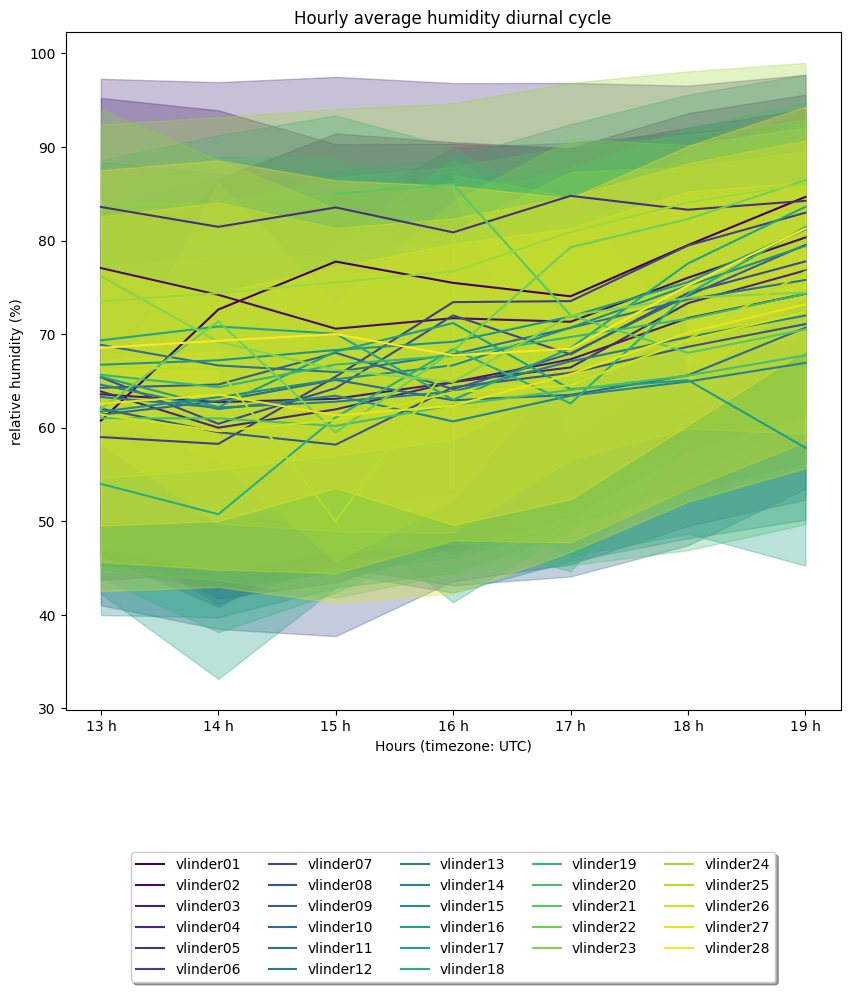

In [4]:
dirunal_statistics = subset.get_diurnal_statistics(colorby='name',
                                                   obstype='humidity', 
                                                   plot=True,
                                                   errorbands=True,
                                                  )
#Note that in this example statistics are computed for a short period and only for the non-windy autumn afternoons.

## Analysis exercise

For a more detailed reference you can use this [Analysis exercise](https://github.com/vergauwenthomas/MetObs_toolkit/blob/4d5a35954eb8ff153eb0d9e9c8a34cee7e3c50f4/fairness_demo_exercises/Urban_analysis_excercise_04.ipynb), which was created in the context of the [COST FAIRNESS](https://www.cost.eu/actions/CA20108/) summer school 2023 in Ghent.